In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import ttest_ind
import re
import math
from category_encoders import TargetEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.discrete.discrete_model as sm
from statsmodels.api import add_constant as ac

In [4]:
df = pd.read_csv("C:/Users/akash/Desktop/Scaler/Case_Study/LoanTap/LoanTap.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.shape

(396030, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

#### Checking the outliers

In [7]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


#### Lets check loan ammount , annual income and revol balance - As these have some differenc in mean and median

In [8]:
df.describe().loc[['mean','50%']]

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
mean,14113.888089,13.6394,431.849698,74203.175798,17.379514,11.311153,0.178191,15844.539853,53.791749,25.414744,1.813991,0.121648
50%,12000.000000,13.3300,375.430000,64000.000000,16.910000,10.000000,0.000000,11181.000000,54.800000,24.000000,1.000000,0.000000


### Univariate 

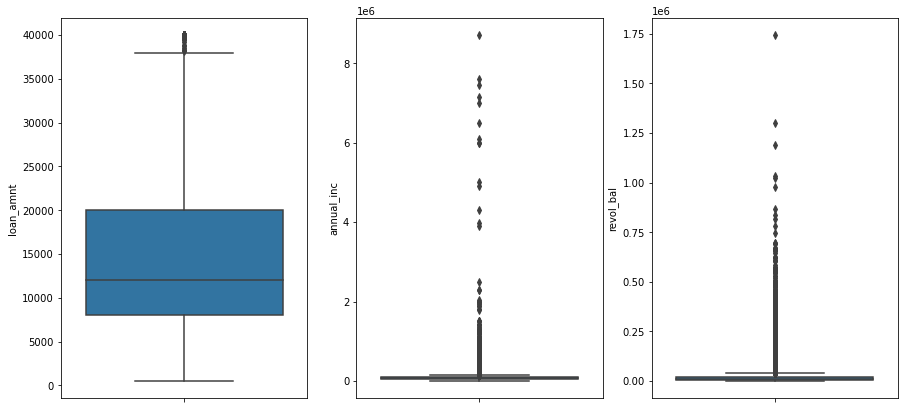

In [9]:
cols = ['loan_amnt' , 'annual_inc' , 'revol_bal']
fig,axs = plt.subplots(nrows = 1 ,ncols = 3 , figsize = (15,7))
axs = axs.flat
index = 0
for col in cols:
    sns.boxplot(y = df[col] , ax = axs[index])
    index += 1
plt.show()

#### What percentage of customers have fully paid their Loan Amount?

In [10]:
(df['loan_status'].value_counts()[0]/len(df))*100

80.38709188697825

#### Lets do % of outliers
 - We have 4 and 5 percent of data as outliers

In [11]:
limits = []
for col in cols:
    IQR =  df[col].quantile(.75) - df[col].quantile(.25)
    limit = ((1.5*IQR)+df[col].quantile(.75))
    limits.append(limit)
    n = sum(df[col] > limit)
    percent = round(n*100/len(df) , 2)
    print('Percentage of Outliers in the {} is {}'.format(col,percent))

Percentage of Outliers in the loan_amnt is 0.05
Percentage of Outliers in the annual_inc is 4.22
Percentage of Outliers in the revol_bal is 5.37


### Lets check for common outlier

In [12]:
len(df[(df['loan_amnt']>limits[0]) & (df['annual_inc']>limits[1]) & (df['revol_bal']>limits[2])])/len(df)

6.312653081837235e-05

#### As we see outliers came out of annual income and revol_bal actually have 4774 data points in which case this will very usefull , So its better not to drop these , as these will even give a new meaning to our Model.

In [13]:
len(df[ (df['annual_inc']>limits[1]) & (df['revol_bal']>limits[2])])

4799

### 0.0063 percent common outliers - Dropping these

In [14]:
df.drop(df[(df['loan_amnt']>limits[0]) & (df['annual_inc']>limits[1]) & (df['revol_bal']>limits[2])].index , inplace = True )
df.shape

(396005, 27)

#### Categorical Values

In [15]:
df.describe(include = 'object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396005,396005,396005,373078,377704,396005,396005,396005,396005,396005,394251,396005,396005,396005,396005
unique,2,7,35,173101,11,6,3,115,2,14,48817,684,2,3,393675
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USS Johnson\r\nFPO AE 48052
freq,301988,116009,26653,4389,126029,198329,139544,14846,318333,234494,152459,3017,238061,395295,8


#### No duplicates

In [16]:
df[df.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


#### Missing Values treatment using mean and mode to Imputate as there is no outliers in features which have missing values

In [17]:
(df.isna().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789573
emp_length              4.621406
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.442924
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069696
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.544071
pub_rec_bankruptcies    0.135099
address                 0.000000
dtype: float64

In [18]:
categorical_missing = ['emp_title','emp_length','title']
numerical_missing = ['mort_acc','pub_rec_bankruptcies','revol_util']
for col in categorical_missing:
    df[col] = df[col].fillna(df[col].mode()[0])
for col in numerical_missing:
    df[col] = df[col].fillna(df[col].mean())

### Bi-Variate
#### Categorical

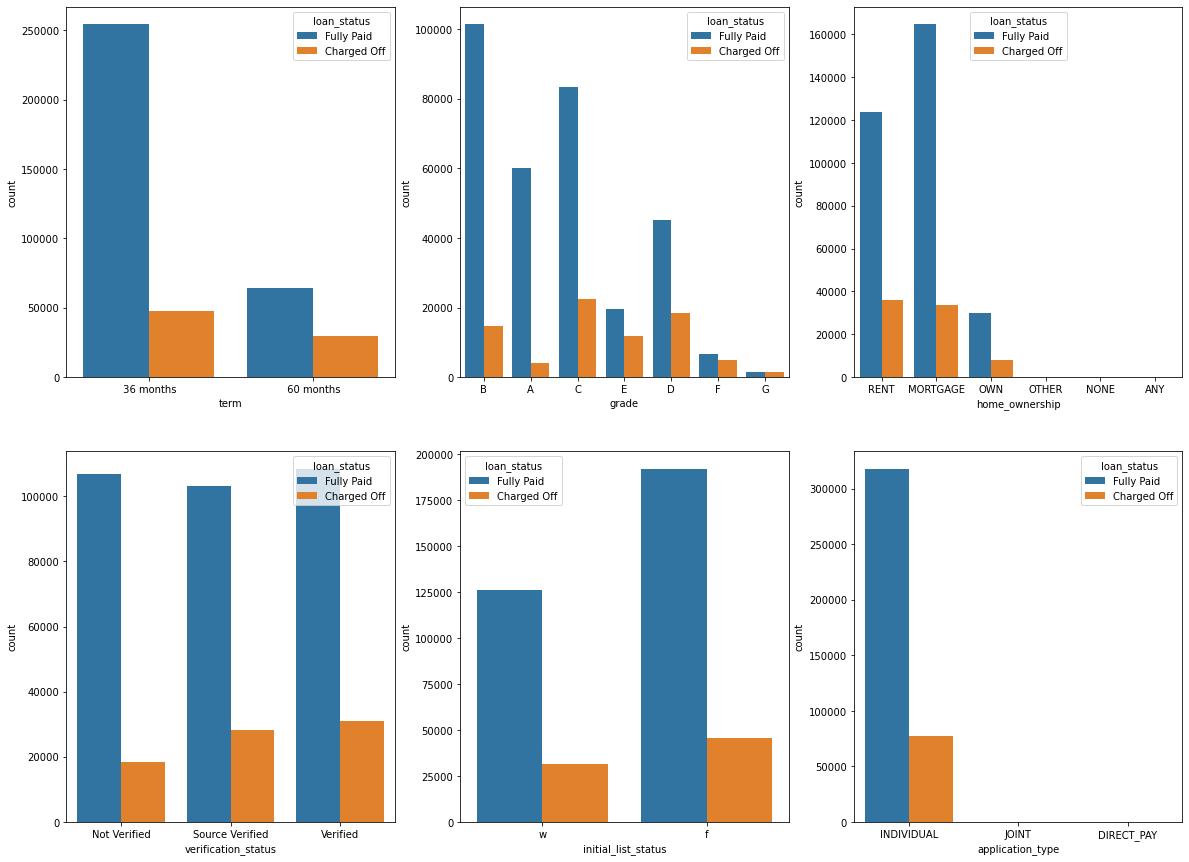

In [19]:
categorical = df.describe(include = 'object').columns
fig, ax = plt.subplots(nrows = 2 , ncols = 3 , figsize = (20,15))
ax = ax.flat
avoid = ['sub_grade','emp_title','issue_d', 'title','earliest_cr_line','address','loan_status','purpose','emp_length']
index = 0
for col in categorical:
    if col in avoid:
        continue
    sns.countplot(x = df[col] , hue = df['loan_status'] , ax = ax[index])
    index += 1 
plt.show()   

#### Many people take 36 Months loan
#### People in grade G and F have high possibility of not paying the loan
#### Very less number of people who owns the house take loan
#### Initerestingly Verified people have high probability of charged off 

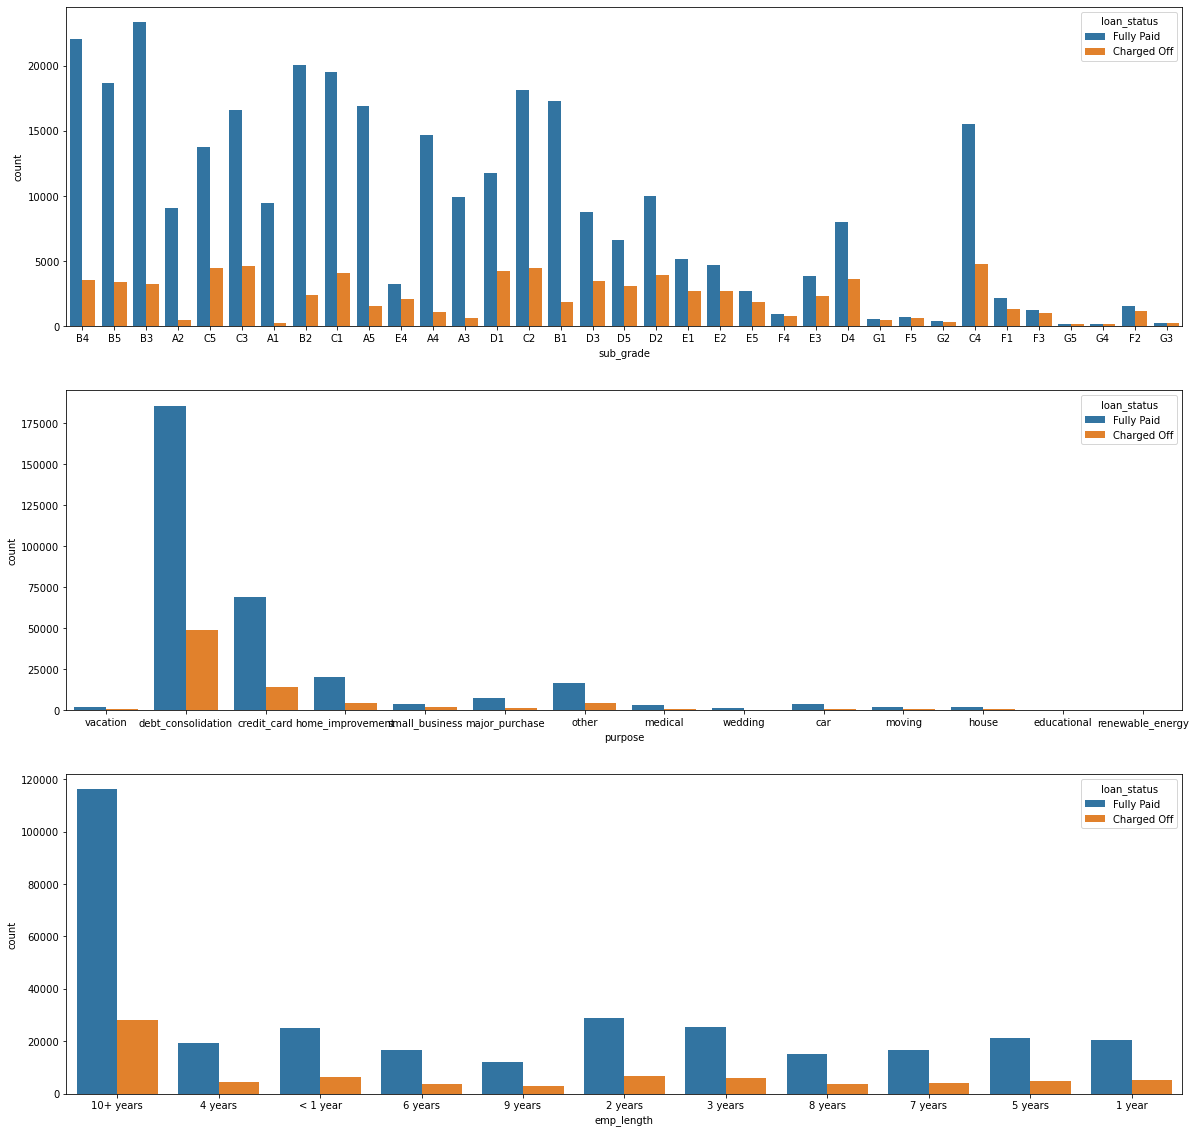

In [20]:
fig, ax = plt.subplots(nrows = 3 , ncols = 1 , figsize = (20,20))
ax = ax.flat
avoid = ['sub_grade','purpose','emp_length']
index = 0
for col in avoid:
    sns.countplot(x = df[col] , hue = df['loan_status'] , ax = ax[index])
    index += 1 
plt.show()   

#### Debt Consolidation and credit card is mostly a purpose for the loan
#### 10+ and 2 year take more loans

#### Numerical 

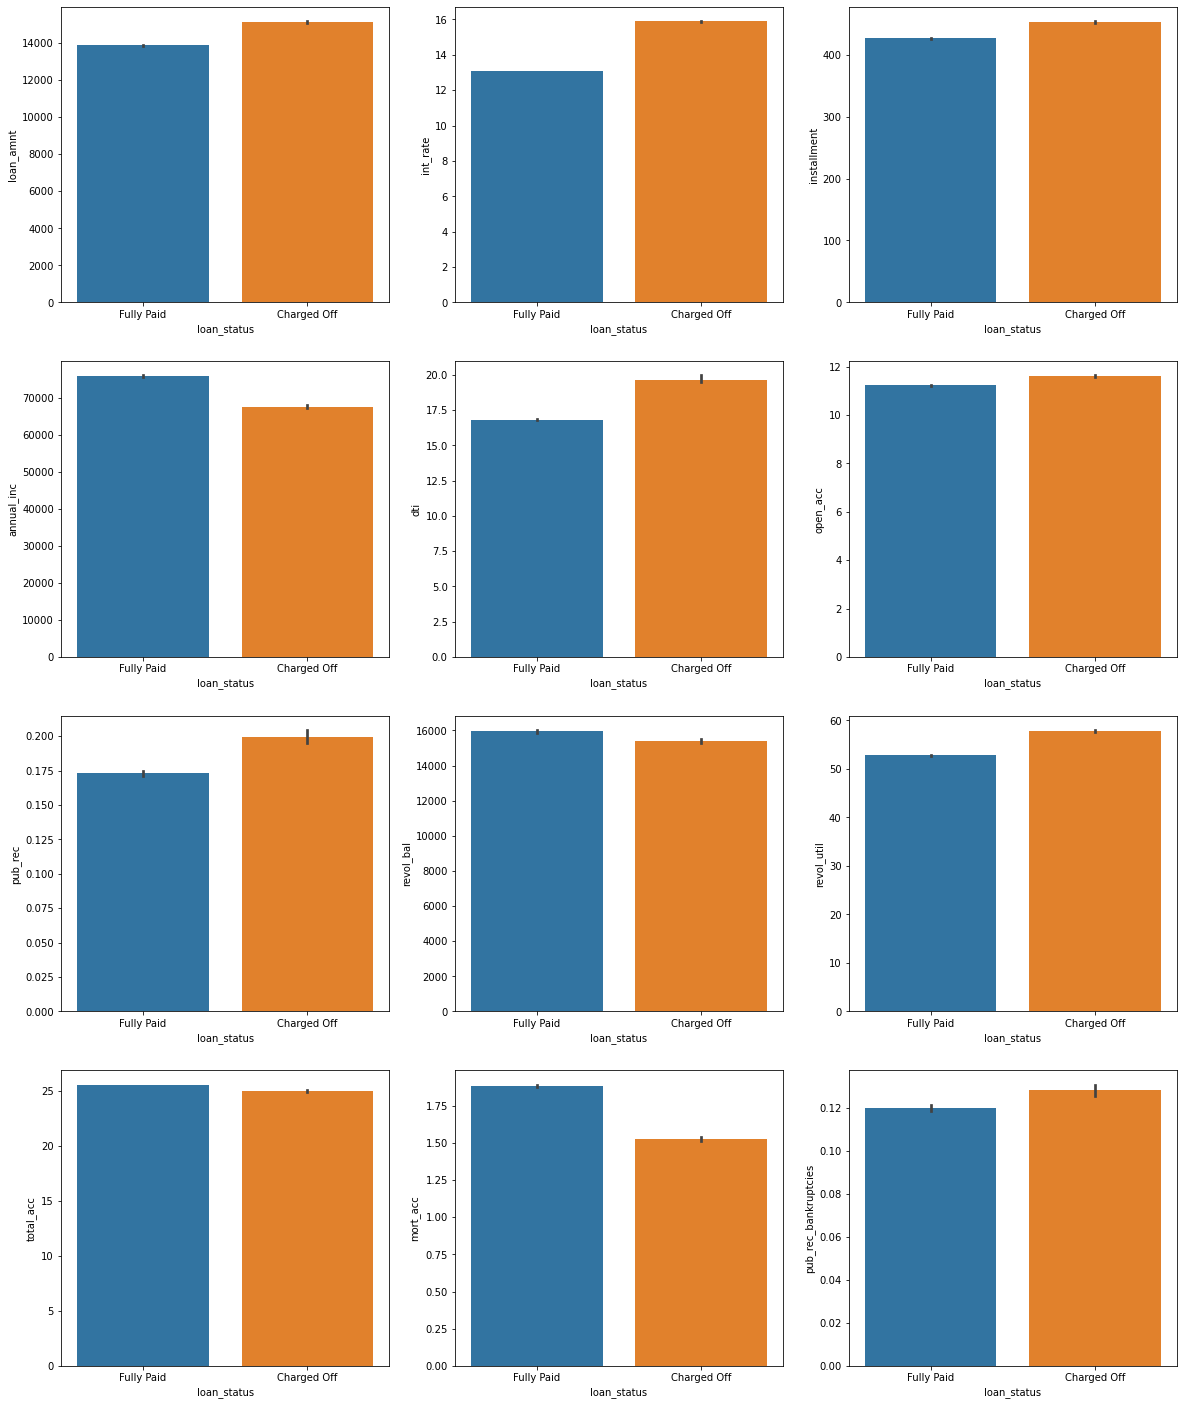

In [21]:
numerical = df.describe().columns
fig, ax = plt.subplots(nrows = 4 , ncols = 3 , figsize = (20,25))
ax = ax.flat
index = 0
for col in numerical:
    sns.barplot(y = df[col] , x = df['loan_status'] , ax = ax[index])
    index += 1 
plt.show()   

#### Loan amount, Interest Rate, Installments ,Cti , pub_rec  - When these have higher value there is a better chance the loan will be charged off
#### Annual Income and mort_acc have positive impact on payin off the loan
#### Other features seems like doesnt have much affect on the loan status , Lets do Hypothesis testing to confirm.

#### Hypothesis Testing - T- Test
 - Null Hypothesis - Feature have same mean for whether loan is paid or charged off.
 - Alternative Hypothesis - Feature have different mean for whether loan is paid or charged off.
 - Significance = 5 percent
 - Features going to test = 'open_acc', 'revol_bal', 'total_acc'
 - To make T-test powerfull taking equal number of samples in each category

In [22]:
test = ['open_acc', 'revol_bal', 'total_acc']
for col in test:
    off = df[df['loan_status'] == 'Charged Off'].dropna()[col]
    paid = df[df['loan_status'] == 'Fully Paid'].dropna().sample(len(off))[col]
    print('T-Test Resolts for {a} - {b}'.format(a = col, b = ttest_ind(paid , off ,equal_var = False)))

T-Test Resolts for open_acc - Ttest_indResult(statistic=-13.493213173325426, pvalue=1.8096729513390234e-41)
T-Test Resolts for revol_bal - Ttest_indResult(statistic=5.913579660052219, pvalue=3.354733420539552e-09)
T-Test Resolts for total_acc - Ttest_indResult(statistic=8.317480217529207, pvalue=9.056766503243447e-17)


#### P-value is significantly lesser than .05 in all the 4 cases which menas we reject Null Hypothesis - All mean are not same 

#### Not able to derive much as annual income got scaled to 1million

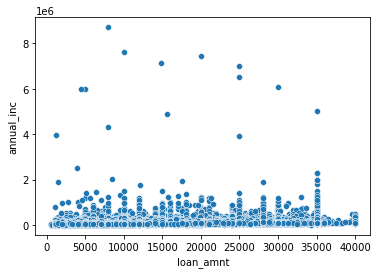

In [23]:
sns.scatterplot( y = 'annual_inc' , x = 'loan_amnt', data =df) 
plt.show()

#### Lot of different interest rate for different people

In [24]:
df['int_rate'].value_counts()

10.99    12410
12.99     9631
15.61     9350
11.99     8582
8.90      8019
         ...  
17.34        1
14.38        1
14.62        1
14.70        1
22.64        1
Name: int_rate, Length: 566, dtype: int64

#### At all Interest we have different loan ammount , interest rate with 30 percent and 40,000 loan ammount as well

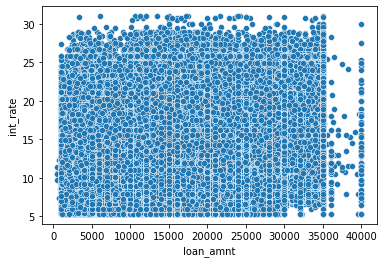

In [25]:
sns.scatterplot( y = 'int_rate' , x = 'loan_amnt', data =df) 
plt.show()

#### Loan Amount increases installment increases

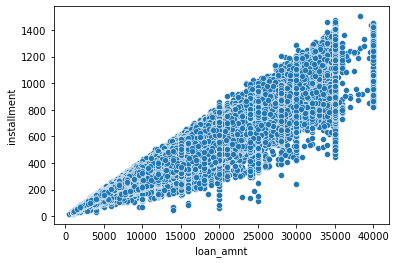

In [26]:
sns.scatterplot( y = 'installment' , x = 'loan_amnt', data =df) 
plt.show()

In [27]:
df.describe().columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

### Multi - Variate
#### Not much can be derived from this 

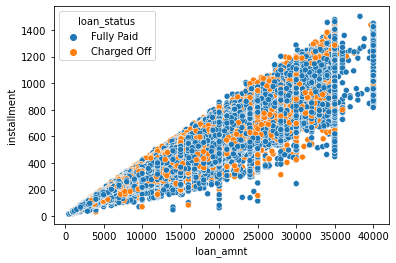

In [28]:
sns.scatterplot( y = 'installment' , x = 'loan_amnt', hue = 'loan_status', data =df) 
plt.show()

#### Higher loan amount gave to verified people at an averange
 - In all different verfication status , there is an equal possibility to paid or charged off.

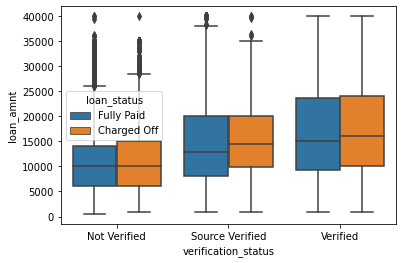

In [29]:
sns.boxplot(hue = 'loan_status' , y = 'loan_amnt' , x = 'verification_status' , data = df)
plt.show()

#### Average Annual Income is high , then probability of paying loan back is high in verification status

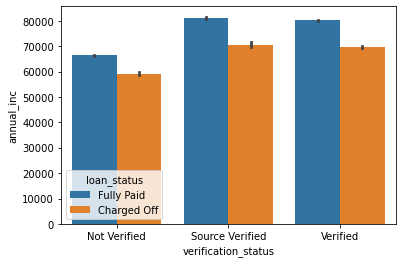

In [30]:
sns.barplot(hue = 'loan_status' , y = 'annual_inc' , x = 'verification_status' , data = df)
plt.show()

#### Interesting information from plot -  grade G have the highest annual income 

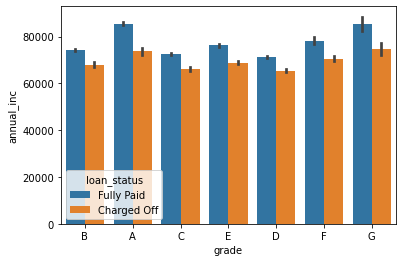

In [31]:
sns.barplot(hue = 'loan_status' , y = 'annual_inc' , x = 'grade' , data = df)
plt.show()

#### which grade people are more likely to pay the loan back

In [32]:
(df[df['loan_status'] == 'Fully Paid']['grade'].value_counts()/ df['grade'].value_counts())*100

B    87.425976
C    78.817701
A    93.711731
D    71.131262
E    62.637363
F    57.208394
G    52.161100
Name: grade, dtype: float64

#### which verification_status people are more likely to pay the loan back

In [33]:
(df[df['loan_status'] == 'Fully Paid']['verification_status'].value_counts()/ df['verification_status'].value_counts())*100

Not Verified       85.364001
Source Verified    78.524726
Verified           77.676575
Name: verification_status, dtype: float64

#### which purpose people are more likely to pay the loan back

In [34]:
(df[df['loan_status'] == 'Fully Paid']['purpose'].value_counts()/ df['purpose'].value_counts())*100

car                   86.523313
credit_card           83.286351
debt_consolidation    79.257891
educational           83.657588
home_improvement      82.991385
house                 80.281690
major_purchase        83.524861
medical               78.288847
moving                76.524177
other                 78.781156
renewable_energy      76.595745
small_business        70.549026
vacation              81.076672
wedding               87.913907
Name: purpose, dtype: float64

In [35]:
data = (df[df['loan_status'] == 'Fully Paid']['emp_title'].value_counts()/df['emp_title'].value_counts()).reset_index()
data = data.drop(data[data['emp_title'].isna()].index)
data.columns = ['emp_title' , 'probability_of_payingback']
data.sort_values(by = 'probability_of_payingback' , ascending = False)

,emp_title,probability_of_payingback
0,NSA Industries llc,1.000000
111895,SHOP TECHNICIAN,1.000000
111913,SIA,1.000000
111912,SIA,1.000000
111911,"SI, LLC",1.000000
...,...,...
132371,Technical Specialist II,0.166667
109640,Rigger,0.166667
152576,closer,0.166667
24060,Central Transport,0.166667


#### Heat Map
 - Loan amount have positive correaltion with Annual Income and revol balance
 - loan amount have very high positve correaltion with installments
 - Annual Income have positive correlation with installment
 - pub_rec_bankcruptcies have very high positive correlation with pub_rec
 - revol bal and pub_rec_bankcruptcies have negative correlation
 - open acc and total acc have high positive correlation
 - pub_rec_bankcruptcies and pub_rec have negative correaltion with loan ammount 
 - Annual income and dti have negative correaltion

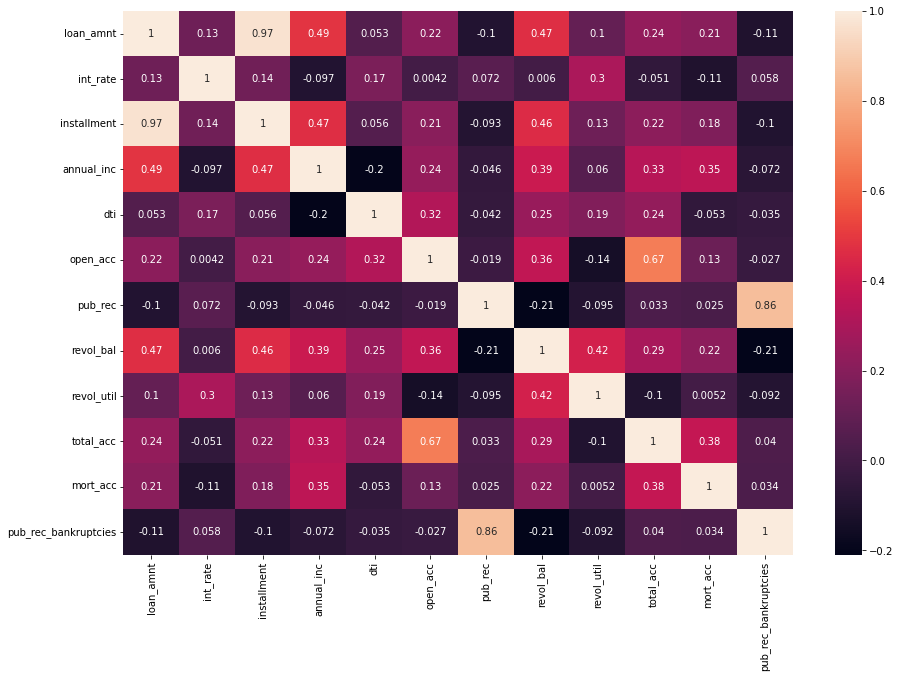

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df.corr(method = 'spearman') , annot = True)
plt.show()

### Pre-Processing

#### Convert issue_d to year

In [37]:
df['issue_year'] = df['issue_d'].apply(lambda x : int(x[re.search('-' , x ).start()+1:]))
df.drop(columns = ['issue_d'] , inplace = True)

#### Converting Address to the given last 4 numbers to gain better understanding on whole area rather than having one address 

In [38]:
df['address'] = df['address'].apply(lambda x : x[-5:])

#### Convert earliest_cr_line to year

In [39]:
df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(lambda x : int(x[re.search('-' , x ).start()+1:]))
df.drop(columns = ['earliest_cr_line'] , inplace = True)

In [40]:
def reg(x):
    return int(re.findall('\d' , x )[0])

In [41]:
df[df['emp_length'] == '< 1 year']['emp_length'] = '0 '
df[df['emp_length'] == '10+ years']['emp_length'] = '10 '
df['emp_length'] = df['emp_length'].apply(reg)

### Encoding
 - Fully Paid = 0
 - Charged off = 1

#### One Hot Encoding

In [42]:
df['loan_status'] = pd.get_dummies(df['loan_status'])['Charged Off']

In [43]:
onehot = ['term','verification_status','initial_list_status' , 'application_type']
for col in onehot:
    temp = pd.get_dummies(df[col]).iloc[:,:-1]
    df.drop(columns = [col] , inplace = True)
    df = pd.merge(df, temp, left_index=True, right_index=True)

#### Ordinal Encoding

In [44]:
enc = OrdinalEncoder()
df['grade'] = enc.fit_transform(np.array(df['grade']).reshape(-1,1))

In [45]:
enc1 = OrdinalEncoder()
df['sub_grade'] = enc1.fit_transform(np.array(df['sub_grade']).reshape(-1,1))

#### Target Encoding

In [46]:
target = ['emp_title','home_ownership','purpose','address','title']
alist = []
for col in target:
    enc = TargetEncoder()
    df[col] = enc.fit_transform(df[col] , df['loan_status'])

In [47]:
df.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,...,pub_rec_bankruptcies,address,issue_year,earliest_cr_line_year,36 months,Not Verified,Source Verified,f,DIRECT_PAY,INDIVIDUAL
0,10000.0,11.44,329.48,1.0,8.0,0.247191,1,0.226620,117000.0,0,...,0.0,0.193801,2015,1990,1,1,0,0,0,1
1,8000.0,11.99,265.68,1.0,9.0,0.316979,4,0.169577,65000.0,0,...,0.0,0.000000,2015,2004,1,1,0,1,0,1
2,15600.0,10.49,506.97,1.0,7.0,0.181819,1,0.226620,43057.0,0,...,0.0,0.000000,2015,2007,1,0,1,1,0,1
3,7200.0,6.49,220.65,0.0,1.0,0.196139,6,0.226620,54000.0,0,...,0.0,0.000000,2014,2006,1,1,0,1,0,1
4,24375.0,17.27,609.33,2.0,14.0,0.196139,9,0.169577,55000.0,1,...,0.0,1.000000,2013,1999,0,0,0,1,0,1


#### Imbalaced data - oversampling the minority 

In [48]:
df['loan_status'].value_counts()

0    318333
1     77672
Name: loan_status, dtype: int64

In [49]:
oversample = RandomOverSampler(sampling_strategy='minority')
x,y = oversample.fit_resample(df.drop(columns = ['loan_status']), df['loan_status'])

In [50]:
y.value_counts()

0    318333
1    318333
Name: loan_status, dtype: int64

#### Standardizing the Data

In [51]:
scaling = StandardScaler()
scaling.fit(x)
scaled = scaling.transform(x)
df_scaled = pd.DataFrame(scaled, columns = x.columns)

In [52]:
df_scaled.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,purpose,...,pub_rec_bankruptcies,address,issue_year,earliest_cr_line_year,36 months,Not Verified,Source Verified,f,DIRECT_PAY,INDIVIDUAL
0,-0.533747,-0.666588,-0.440616,-0.783166,-0.644126,0.214728,-0.761234,1.066051,0.728663,-0.336095,...,-0.344274,-0.368318,0.905703,-1.119172,0.645571,1.581848,-0.722349,-1.217491,-0.030764,0.042981
1,-0.771181,-0.546418,-0.695803,-0.783166,-0.498364,0.823078,0.426438,-1.028366,-0.106978,0.430700,...,-0.344274,-0.905912,0.905703,0.820650,0.645571,1.581848,-0.722349,0.821362,-0.030764,0.042981
2,0.131065,-0.874154,0.269309,-0.783166,-0.789888,-0.355126,-0.761234,1.066051,-0.459602,-1.267692,...,-0.344274,-0.905912,0.905703,1.236326,0.645571,-0.632172,1.384372,0.821362,-0.030764,0.042981
3,-0.866154,-1.748118,-0.875914,-1.503971,-1.664459,-0.230296,1.218220,1.066051,-0.283748,-1.267692,...,-0.344274,-0.905912,0.209420,1.097767,0.645571,1.581848,-0.722349,0.821362,-0.030764,0.042981
4,1.172803,0.607215,0.678728,-0.062360,0.230446,-0.230296,2.405893,-1.028366,-0.267678,-1.267692,...,-0.344274,1.868043,-0.486863,0.127856,-1.549016,-0.632172,-0.722349,0.821362,-0.030764,0.042981


#### Train - Val - Test Split

In [53]:
x_train,x_test,y_train,y_test = train_test_split(df_scaled,y,test_size =.2)

In [54]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size =.25)

#### Model - 1 Logistic Regression
 - 83 percent accuracy is definitely not  good

In [55]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)
print("Train score : {a}, val socre : {b}".format(a = model1.score(x_train,y_train) , b = model1.score(x_val,y_val)))

Train score : 0.8295885591323537, val socre : 0.8302953672653594


In [56]:
print("Train f1_score score : {a}, val f1_score socre : {b}".format(a = f1_score(y_train,model1.predict(x_train)) , 
                                                                  b = f1_score(y_val,model1.predict(x_val))))

Train f1_score score : 0.8276986519643523, val f1_score socre : 0.8289683010803752


#### AUC - ROC Score
 - this score seems to be better in both train and val

In [57]:
print("Train ROC-AUC score : {a}, val ROC-AUC socre : {b}".format(a = roc_auc_score(y_train,model1.predict_proba(x_train)[:,1]) , 
                                                                  b = roc_auc_score(y_val,model1.predict_proba(x_val)[:,1])))

Train ROC-AUC score : 0.9281668121361394, val ROC-AUC socre : 0.9277162314242234


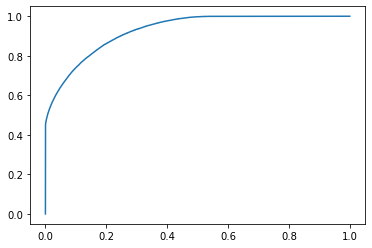

In [58]:
fpr,tpr,th = roc_curve(y_train,model1.predict_proba(x_train)[:,1])
plt.plot(fpr,tpr)
plt.show()

#### Model - 2 Logistic Regression using elastic net not much improvement in this case
 - 83 percent accuracy is definitely not  good

In [59]:
model2 = LogisticRegression(penalty='elasticnet' , solver = 'saga' , l1_ratio = 0.5)
model2.fit(x_train,y_train)
print("Train score : {a}, val socre : {b}".format(a = model2.score(x_train,y_train) , b = model2.score(x_val,y_val)))

Train score : 0.8289681386600488, val socre : 0.8290231126259493


In [60]:
print("Train f1_score score : {a}, val f1_score socre : {b}".format(a = f1_score(y_train,model2.predict(x_train)) , 
                                                                  b = f1_score(y_val,model2.predict(x_val))))

Train f1_score score : 0.8256383705538238, val f1_score socre : 0.826305837674823


#### AUC - ROC Score
 - this score seems to be better in both train and val

In [61]:
print("Train ROC-AUC score : {a}, val ROC-AUC socre : {b}".format(a = roc_auc_score(y_train,model2.predict_proba(x_train)[:,1]) , 
                                                                  b = roc_auc_score(y_val,model2.predict_proba(x_val)[:,1])))

Train ROC-AUC score : 0.9281470248667385, val ROC-AUC socre : 0.9277437502442812


#### There doesnt seems to be much difference between train and val score lets plot the ROC- AUC Curve

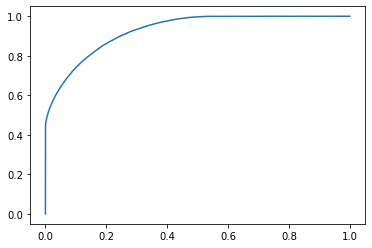

In [62]:
fpr,tpr,th = roc_curve(y_train,model2.predict_proba(x_train)[:,1])
plt.plot(fpr,tpr)
plt.show()

#### Not much difference in both the models , so lets go with model1 
#### Model  Interpretation
 - Below are the top 5 important feature as per our model

In [63]:
coeff = pd.DataFrame({"Coeff" : model1.coef_.reshape(len(df_scaled.columns),) , 'Features' : df_scaled.columns})
coeff.sort_values(by = 'Coeff' , ascending=False).head()

,Coeff,Features
19,13.432821,address
5,0.899045,emp_title
11,0.858744,dti
4,0.549186,sub_grade
10,0.422012,title


#### Stats Model Summary
 - here as well address was given more importance in training the model.
 - we can see the 95 percent confidence interval for each features.

In [64]:
x_sm = ac(x_train)
model = sm.Logit(y_train,x_sm).fit()
model.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 14


C:\Users\akash\Anaconda3\envs\fiona\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\akash\Anaconda3\envs\fiona\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:               381999
Model:                          Logit   Df Residuals:                   381970
Method:                           MLE   Df Model:                           28
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                     inf
Time:                        18:57:03   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.2306      0.103     50.899      0.000       5.029       5.432
loan_amnt                 0.0483      0.036      1.340      0.180      -0.022       0.119
int_rate                 -0.1040      0.024     -4.382      0.000      -0.150      -0.057
installment               0.0230      0.033      0.692      0.489      -0.042       0.088
grade                     0.0255      0.024      1.056      0.291      -0.022       0.073
sub_grade                 0.5503      0.034     16.349      0.000       0.484       0.616
emp_title                 0.8999      0.007    122.258      0.000       0.886       0.914
emp_length               -0.0105      0.005     -2.104      0.035      -0.020      -0.001
home_ownership            0.1334      0.006     23.662      0.000       0.122       0.144
annual_inc               -0.0591      0.008     -7.011      0.000      -0.076      -0.043
purpose                  -0.0723      0.005    -13.238      0.000      -0.083      -0.062
title                     0.4223      0.007     61.094      0.000       0.409       0.436
dti                       0.8612      0.027     31.797      0.000       0.808       0.914
open_acc                  0.1456      0.007     19.999      0.000       0.131       0.160
pub_rec                   0.0476      0.008      6.104      0.000       0.032       0.063
revol_bal                -0.0570      0.007     -8.725      0.000      -0.070      -0.044
revol_util                0.1215      0.006     21.629      0.000       0.110       0.132
total_acc                -0.1185      0.008    -15.516      0.000      -0.133      -0.104
mort_acc                 -0.0583      0.006     -9.487      0.000      -0.070      -0.046
pub_rec_bankruptcies     -0.0268      0.007     -3.802      0.000      -0.041      -0.013
address                  14.3221      0.283     50.566      0.000      13.767      14.877
issue_year               -0.0953      0.006    -15.802      0.000      -0.107      -0.083
earliest_cr_line_year    -0.0034      0.005     -0.632      0.527      -0.014       0.007
 36 months               -0.2094      0.013    -16.397      0.000      -0.234      -0.184
Not Verified             -0.0557      0.006     -9.330      0.000      -0.067      -0.044
Source Verified           0.0073      0.006      1.286      0.198      -0.004       0.018
f                         0.0347      0.005      6.366      0.000       0.024       0.045
DIRECT_PAY                0.0337      0.007      4.589      0.000       0.019       0.048
INDIVIDUAL                0.0553      0.007      7.581      0.000       0.041       0.070
=========================================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### precsion vs recall see how it behaves - it looks to be approximately equal - As it was oversampled due to imbalce in data

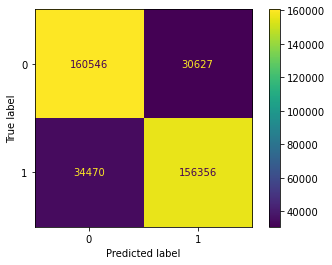

In [65]:
cm = confusion_matrix(y_train,model1.predict(x_train))
plot_confusion_matrix(model1,x_train,y_train)
plt.show()

#### Threshold - 0.5 gives best results for Accuracy

In [66]:
model_thres = LogisticRegression()
model_thres.fit(x_train,y_train)
train_prob = model_thres.predict_proba(x_train)[:,1]
val_prob = model_thres.predict_proba(x_val)[:,1]
train = []
val = []
for i in np.arange(0.1,1,0.1):
    train.append(sum(1*(train_prob > i) == y_train)/len(y_train))
    val.append(sum(1*(val_prob > i) == y_val)/len(y_val))
    
df = pd.DataFrame(data = [val,train,np.arange(0.1,1,0.1)]).T
df.columns = ['Acc_val','Acc_train','threshold']
df

,Acc_val,Acc_train,threshold
0,0.733965,0.734025,0.1
1,0.773735,0.772772,0.2
2,0.807096,0.806918,0.3
3,0.827555,0.827369,0.4
4,0.830295,0.829589,0.5
5,0.817164,0.819214,0.6
6,0.796125,0.797968,0.7
7,0.767939,0.770601,0.8
8,0.740209,0.742526,0.9


#### Threshold - 0.5 gives best results for Precision and Recall , But as per the advice from SME whether TN or FP which needs to be handled with care in this case 
 - FP - will make bank to write off more loans by giving out loans to not eligible candidate.
 - FN - will make bank to loss the customer who might pay the loan back depends on what SME or mangement thinks more importance can use the threshold accordingly.

In [67]:
train_prob = model_thres.predict_proba(x_train)[:,1]
val_prob = model_thres.predict_proba(x_val)[:,1]
train_p = []
val_p = []
train_r = []
val_r = []
for i in np.arange(0.1,1,0.1):
    train_p.append(precision_score(y_train,1*(train_prob > i)))
    val_p.append(precision_score(y_val,1*(val_prob > i)))
    train_r.append(recall_score(y_train,1*(train_prob > i)))
    val_r.append(recall_score(y_val,1*(val_prob > i)))
df = pd.DataFrame(data = [np.arange(0.1,1,0.1),val_p,train_p,val_r,train_r]).T
df.columns = ['threshold','precision_val','precision_train','recall_val','recall_train']
df

,threshold,precision_val,precision_train,recall_val,recall_train
0,0.1,0.653652,0.652717,0.999343,0.999198
1,0.2,0.692318,0.690452,0.988309,0.988141
2,0.3,0.738459,0.737000,0.953141,0.953879
3,0.4,0.789238,0.787243,0.895467,0.896786
4,0.5,0.838545,0.836204,0.819607,0.819364
5,0.6,0.882990,0.882893,0.732729,0.735681
6,0.7,0.924470,0.924466,0.646524,0.648559
7,0.8,0.962385,0.962804,0.559395,0.562518
8,0.9,0.989111,0.989715,0.487636,0.489671


#### Tradeoff Questions:
#### How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
 - In this case we need less FP - So we have to consider Precision, to have a better precision we can take threshold as .7 becoz anything more than this , will cause to give very poor result in recall.

#### Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.
 - In this case we need less FN - So we have to consider Recall, to have a better recall we can take threshold as .3 becoz anything less than this , will cause to give very poor result in precision.

#### Experimenting with different Model

#### Model- 3 Descision Tree

In [68]:
model3 = DecisionTreeClassifier(max_depth = 6)
model3.fit(x_train,y_train)
model3.score(x_val,y_val)

0.8162848593844486

In [69]:
model3 = DecisionTreeClassifier(max_depth = 70)
model3.fit(x_train,y_train)
model3.score(x_val,y_val)

0.9226359231306889

In [70]:
model3 = DecisionTreeClassifier(min_samples_split = 20 , min_samples_leaf = 10)
model3.fit(x_train,y_train)
model3.score(x_val,y_val)

0.8663818491671444

#### Model - 4 Random Forest 

In [71]:
model4 = RandomForestClassifier(min_samples_split = 10 , min_samples_leaf = 5 )
model4.fit(x_train,y_train)
model4.score(x_val,y_val)

0.9205940329686727